In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from time import time

In [23]:
df_final = pd.DataFrame.from_csv('C:/Users/Stevens/Desktop/BIA 656/Project/df_final.csv')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(['Close: t'], axis=1).values, 
                                                    df_final['Close: t'].values, 
                                                    test_size=0.3, 
                                                    random_state=42)

[  23.24   44.11   63.     78.59   92.41  100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.  ]


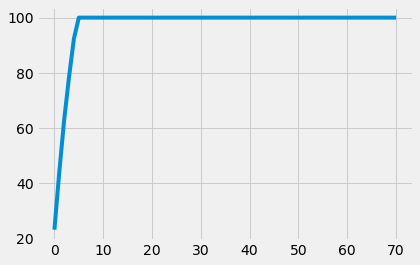

In [6]:
pca_plot = PCA().fit(X_train)
pca_plot = np.cumsum(np.round(pca_plot.explained_variance_ratio_, decimals=4)*100)
plt.plot(pca_plot)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca_plot)

In [25]:
n_components = len(pca_plot[pca_plot < 95])
print("Extracting the top %d components from %d variables"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized').fit(X_train)
print("done in %0.3fs" % (time() - t0))

print("Projecting the input data on the orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 5 components from 305 variables
done in 0.012s
Projecting the input data on the orthonormal basis
done in 0.002s


In [27]:
def performSVR(X_train, y_train, X_test, y_test):
    """
    SVM Regression
    """
    
    # Fit regression model
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    
    # Predict
    y_rbf = svr_rbf.fit(X_train, y_train)
    y_lin = svr_lin.fit(X_train, y_train)
    y_poly = svr_poly.fit(X_train, y_train)
    
    accuracy_rbf = y_rbf.score(X_test, y_test)
    accuracy_lin = y_lin.score(X_test, y_test)
    accuracy_poly = y_poly.score(X_test, y_test)
    
    return accuracy_rbf, accuracy_lin, accuracy_poly

def performAdaBoostR(X_train, y_train, X_test, y_test):
    """
    Ada Boosting binary Classification
    """
    
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    
    # Fit regression model
    DTR = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
    ADA = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng).fit(X, y)

    # Predict
    #y_1 = DTR.predict(X_train)
    #y_2 = ADA.predict(X_train)
    
    accuracy_DTR = clf.score(X_test, y_test)
    accuracy_ADA = clf.score(X_test, y_test)
    
    return accuracy_DTR, accuracy_ADA

In [ ]:
performSVR(X_train, y_train, X_test, y_test)

In [ ]:
# Based on http://francescopochetti.com/pythonic-cross-validation-time-series-pandas-scikit-learn/

def performTimeSeriesCV(X_train, y_train, number_folds, algorithm, parameters):
    print 'Parameters --------------------------------> ', parameters
    print 'Size train set: ', X_train.shape
    
    k = int(np.floor(float(X_train.shape[0]) / number_folds))
    print 'Size of each fold: ', k
    
    accuracies = np.zeros(folds-1)
 
    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print ''
        
        split = float(i-1)/i
        
        print 'Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) 

        X = X_train[:(k*i)]
        y = y_train[:(k*i)]
        print 'Size of train + test: ', X.shape # the size of the dataframe is going to be k*i
 
        index = int(np.floor(X.shape[0] * split))
        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]
        
        accuracies[i-2] = performClassification(X_trainFolds, y_trainFolds, X_testFolds, y_testFolds, algorithm, parameters)
        print 'Accuracy on fold ' + str(i) + ': ', acc[i-2]
    
    # the function returns the mean of the accuracy on the n-1 folds    
    return accuracies.mean()

In [ ]:
# split into train and test sets
X = df_final.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()